In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from collections import Counter

In [379]:
# Importing dataset and separating labels

train_data = pd.read_csv("D:\ML\Datasets\emails.csv")
train_data = train_data.drop_duplicates(subset=['text'])
Y = train_data['spam']
train_data.drop(labels='spam', axis=1, inplace=True)
train_data['text'] = train_data['text'].str.replace('\d+', '')

In [380]:
train_data.head()

,text
0,Subject: naturally irresistible your corporate...
1,Subject: the stock trading gunslinger fanny i...
2,Subject: unbelievable new homes made easy im ...
3,Subject: color printing special request addi...
4,"Subject: do not have money , get software cds ..."


In [381]:
# Creating bag of words

vectorizer = CountVectorizer(stop_words=['subject'])
                             #, max_features=5000) 
                             #, strip_accents="unicode")
X = vectorizer.fit_transform(train_data.text)
features = vectorizer.get_feature_names() # to check feature names if required
X = X.toarray()
X.shape

(5695, 33687)

#### Feature scaling:

In [382]:
#X = MinMaxScaler().fit_transform(X)
np.mean(X), np.std(X)

(0.006396008412203935, 0.21939533255706814)

#### Implementing PCA and converting normalised features into a table format:

In [383]:
pca_spam = PCA(n_components=1)
principalComponents_spam = pca_spam.fit_transform(X)
feat_cols = ['principal component ' + str(i + 1) for i in range (principalComponents_spam.shape[1])]
principal_spam_Df = pd.DataFrame(data=principalComponents_spam, columns=feat_cols)
principal_spam_Df.head()

,principal component 1
0,-4.501412
1,-12.695766
2,-10.620300
3,-13.880738
4,-13.560669


In [384]:
# percentage of variance explained for each components.explained_variance_ratio is used to calculate the variance ratio
# between the first two components
print('Explained variation per principal component : {}'.format(pca_spam.explained_variance_ratio_))

Explained variation per principal component : [0.51728779]


In [385]:
# creating dataframes

pca_feature = principal_spam_Df
pca_label = pd.DataFrame(data=list(Y), columns=['label'])

<Figure size 432x288 with 0 Axes>

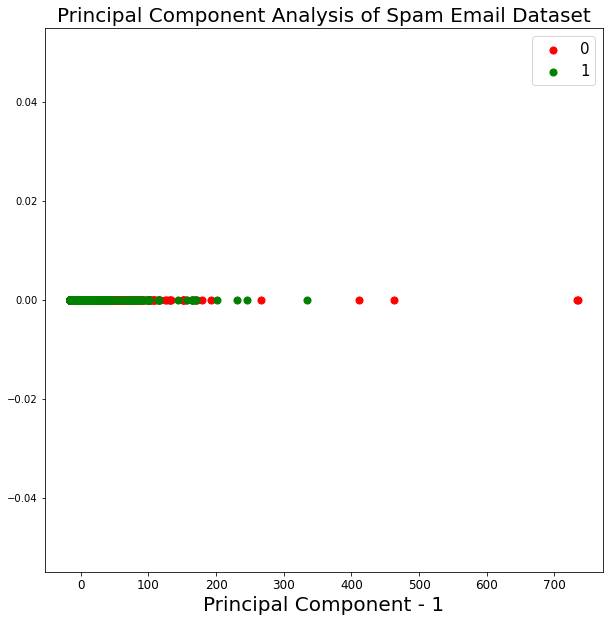

In [386]:
# visualizing the transformed variables by plotting the principal component

plt.figure()
plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.title ("Principal Component Analysis of Spam Email Dataset", fontsize=20)
#targets=['Benign', 'Malignant']
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = pca_label['label'] == target
    y = np.zeros(pca_feature.loc[indicesToKeep, 'principal component 1'].shape)
    plt.scatter(pca_feature.loc[indicesToKeep,'principal component 1'], y, c=color, s=50)
plt.legend(targets, prop={'size': 15})
plt.show()